In [ ]:
# prompt: add code to load my drive and access train and test datasets from data folder in my drive
!pip install seaborn
!pip install --upgrade scikit-learn

import seaborn as sns
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Mounted at /content/drive


In [ ]:
# Access train and test datasets from data folder in my drive
train_data_path = '/content/drive/MyDrive/Data/fraudTrain/fraudTrain.csv'
test_data_path = '/content/drive/MyDrive/Data/fraudTest/fraudTest.csv'

# Load the datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
filtered_data = train_data.drop(['Unnamed: 0', 'cc_num','dob', 'street', 'city', 'state', 'zip', 'first', 'last', 'trans_num'], axis = 1)

In [ ]:
x_data = filtered_data.drop(['is_fraud'], axis = 1)
y_data = filtered_data.is_fraud
print(y_data.value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


As we can see there is a huge imbalance for fraud and not fraud. We will need to assign specific model weights to make the model not constantly predict one thing as a specific value. We will further clean our datasets by using the .info() method to see int64, float64 and object data

In [ ]:
#print(x_data.info())
#print(x_data['trans_date_trans_time'].head(1))
x_data['trans_date_trans_time'] = pd.to_datetime(x_data['trans_date_trans_time'])
#print(x_data.info())
x_data['gender'] = x_data['gender'].astype(str)
one_hot_encoded = pd.get_dummies(x_data['gender']).astype('int64')
x_data = pd.concat([x_data, one_hot_encoded], axis = 1)
x_data.drop(['gender'], axis = 1, inplace = True)
#print(x_data.info())
#print(x_data.head(5))

from sklearn.preprocessing import LabelEncoder

data_to_encode = x_data['category']
encoded = LabelEncoder().fit_transform(data_to_encode)
encoded_data = pd.DataFrame(encoded)
#print(encoded_data.head(5))


### encoding the job
encode_job = x_data['job']
encoded_job = pd.DataFrame(LabelEncoder().fit_transform(encode_job))

x_data['category'] = encoded_data
x_data['job'] = encoded_job
x_data.info()
x_data = x_data.drop(['merchant'], axis = 1)

x_data = x_data.astype('int64')
print(x_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  int64         
 3   amt                    1296675 non-null  float64       
 4   lat                    1296675 non-null  float64       
 5   long                   1296675 non-null  float64       
 6   city_pop               1296675 non-null  int64         
 7   job                    1296675 non-null  int64         
 8   unix_time              1296675 non-null  int64         
 9   merch_lat              1296675 non-null  float64       
 10  merch_long             1296675 non-null  float64       
 11  F                      1296675 non-null  int64         
 12  M                      12966

In [ ]:
print(x_data.head(3))

   trans_date_trans_time  category  amt  lat  long  city_pop  job   unix_time  \
0    1546300818000000000         8    4   36   -81      3495  370  1325376018   
1    1546300844000000000         4  107   48  -118       149  428  1325376044   
2    1546300851000000000         0  220   42  -112      4154  307  1325376051   

   merch_lat  merch_long  F  M  
0         36         -82  1  0  
1         49        -118  1  0  
2         43        -112  0  1  


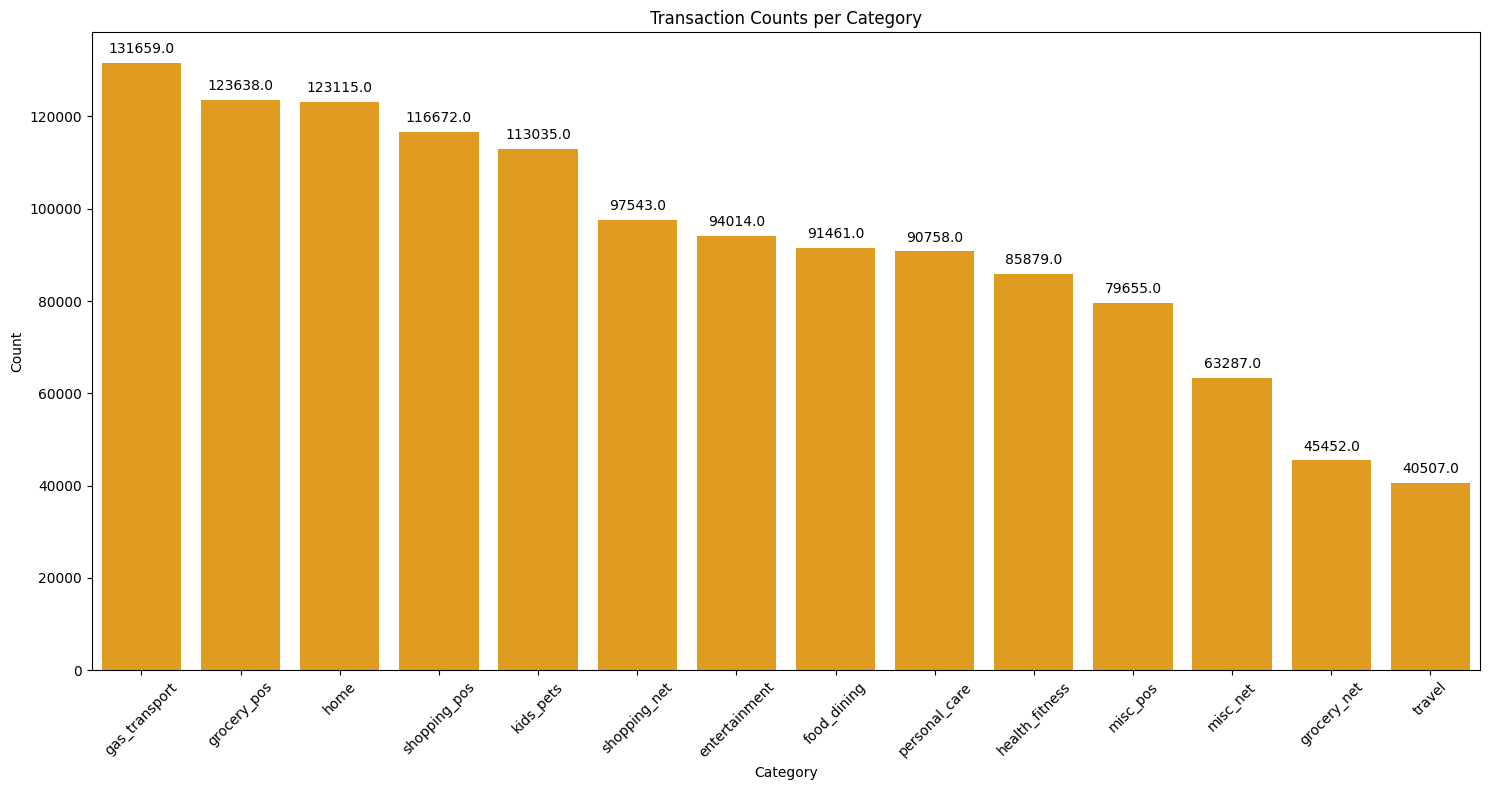

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='category', data=train_data, order=train_data['category'].value_counts().index, color='orange')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Transaction Counts per Category')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


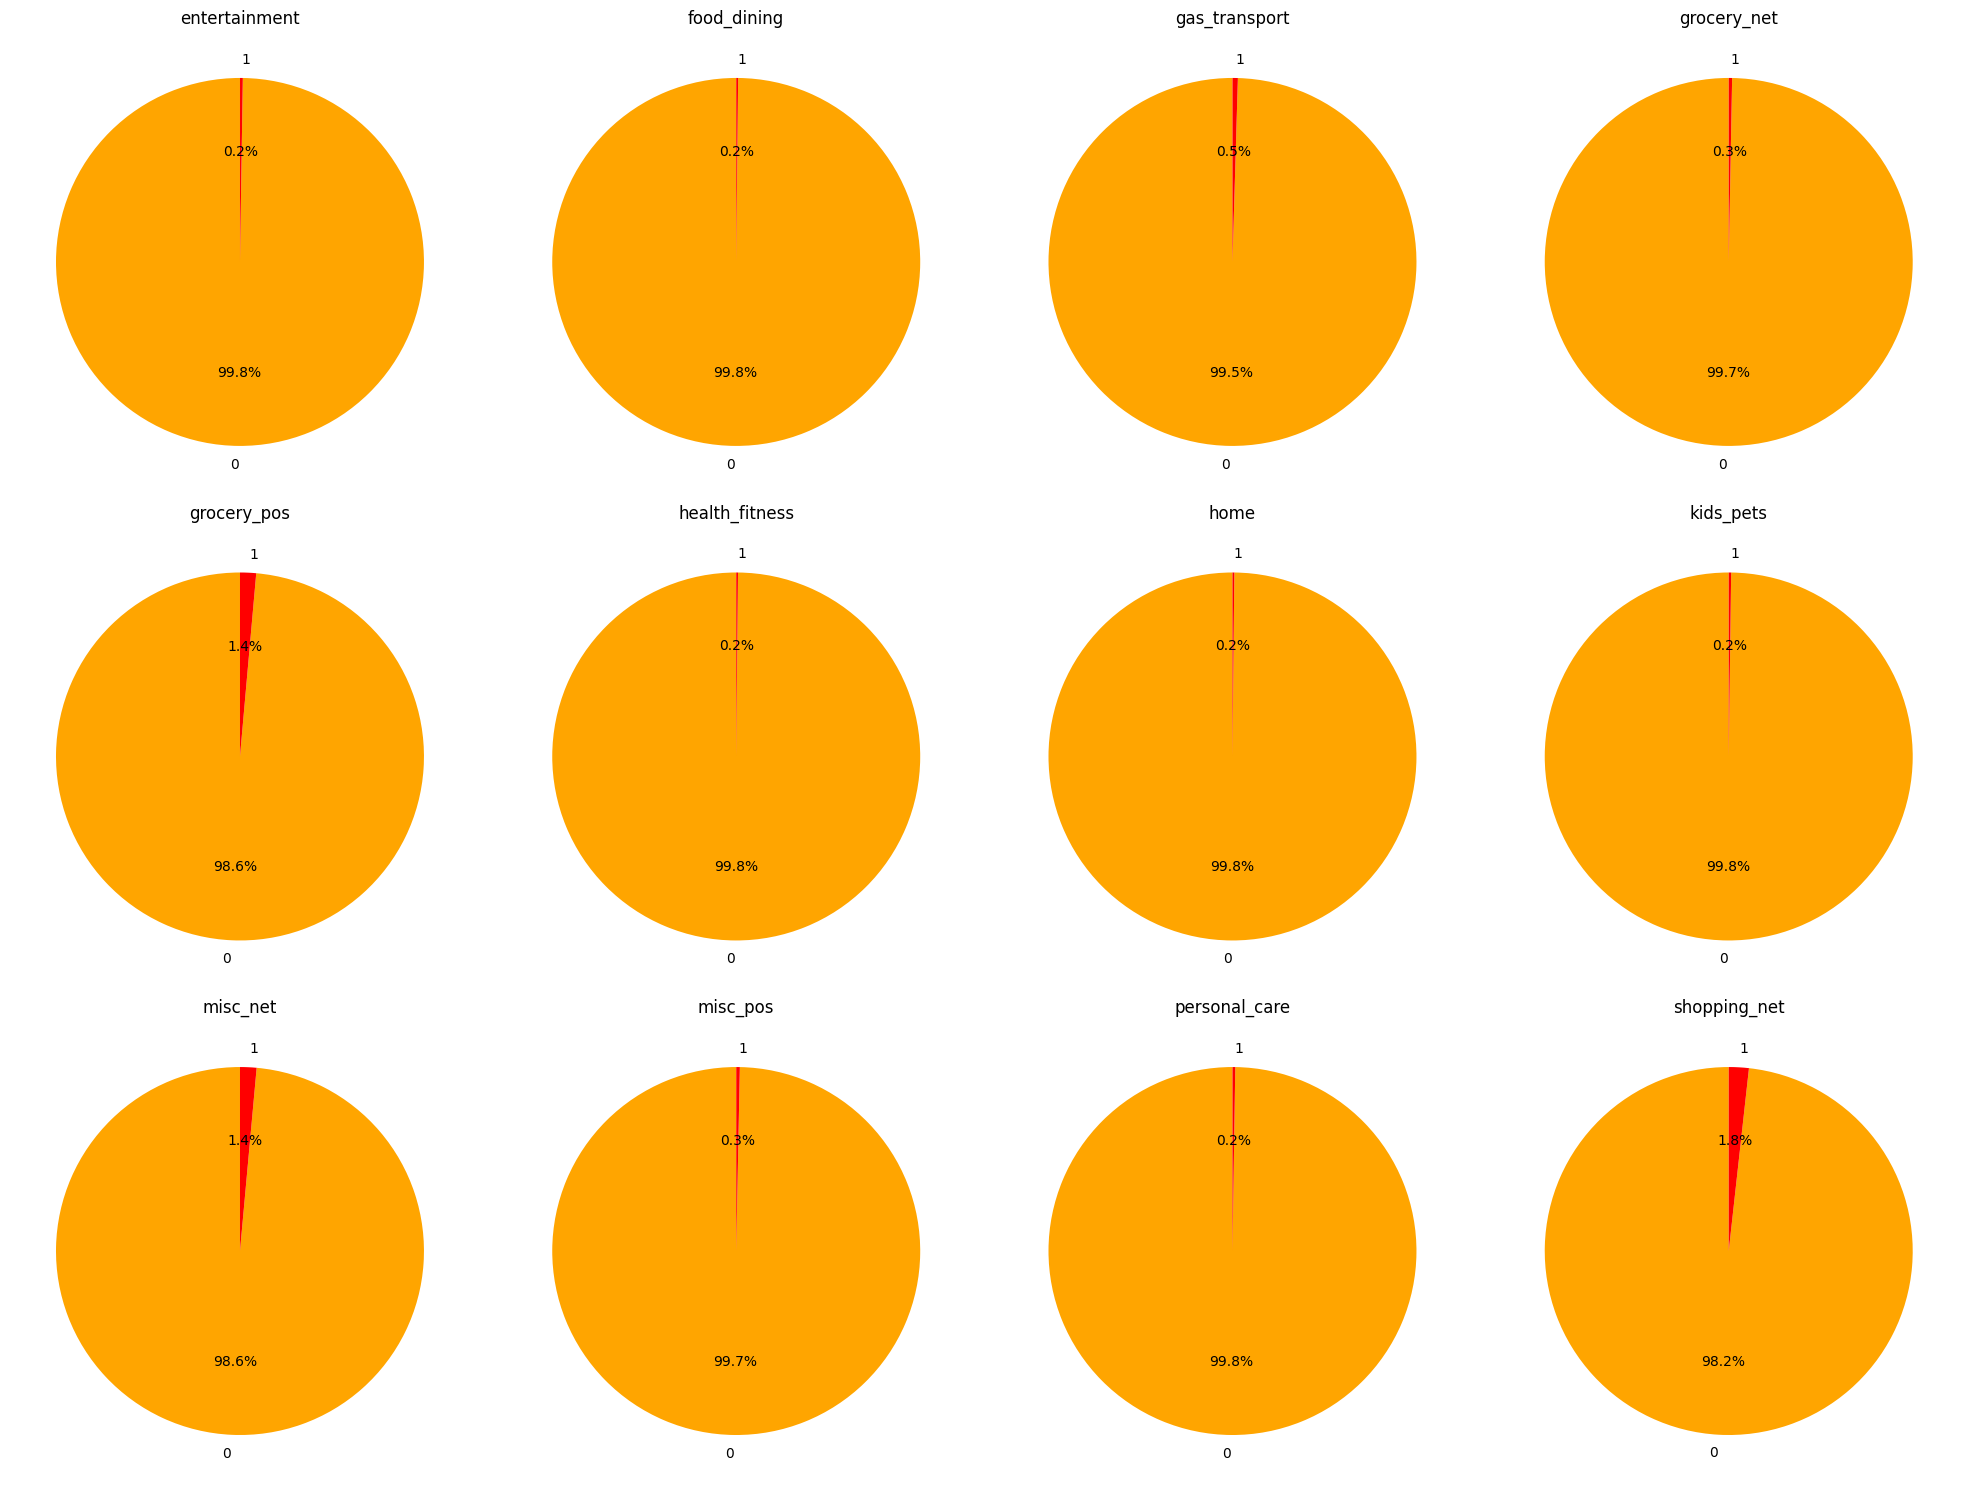

In [ ]:
category_fraud_dist = train_data.groupby(['category', 'is_fraud']).size().unstack()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()


colors = ['orange', 'red']

for ax, (category, counts) in zip(axes, category_fraud_dist.iterrows()):
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(category)

plt.tight_layout()
plt.show()


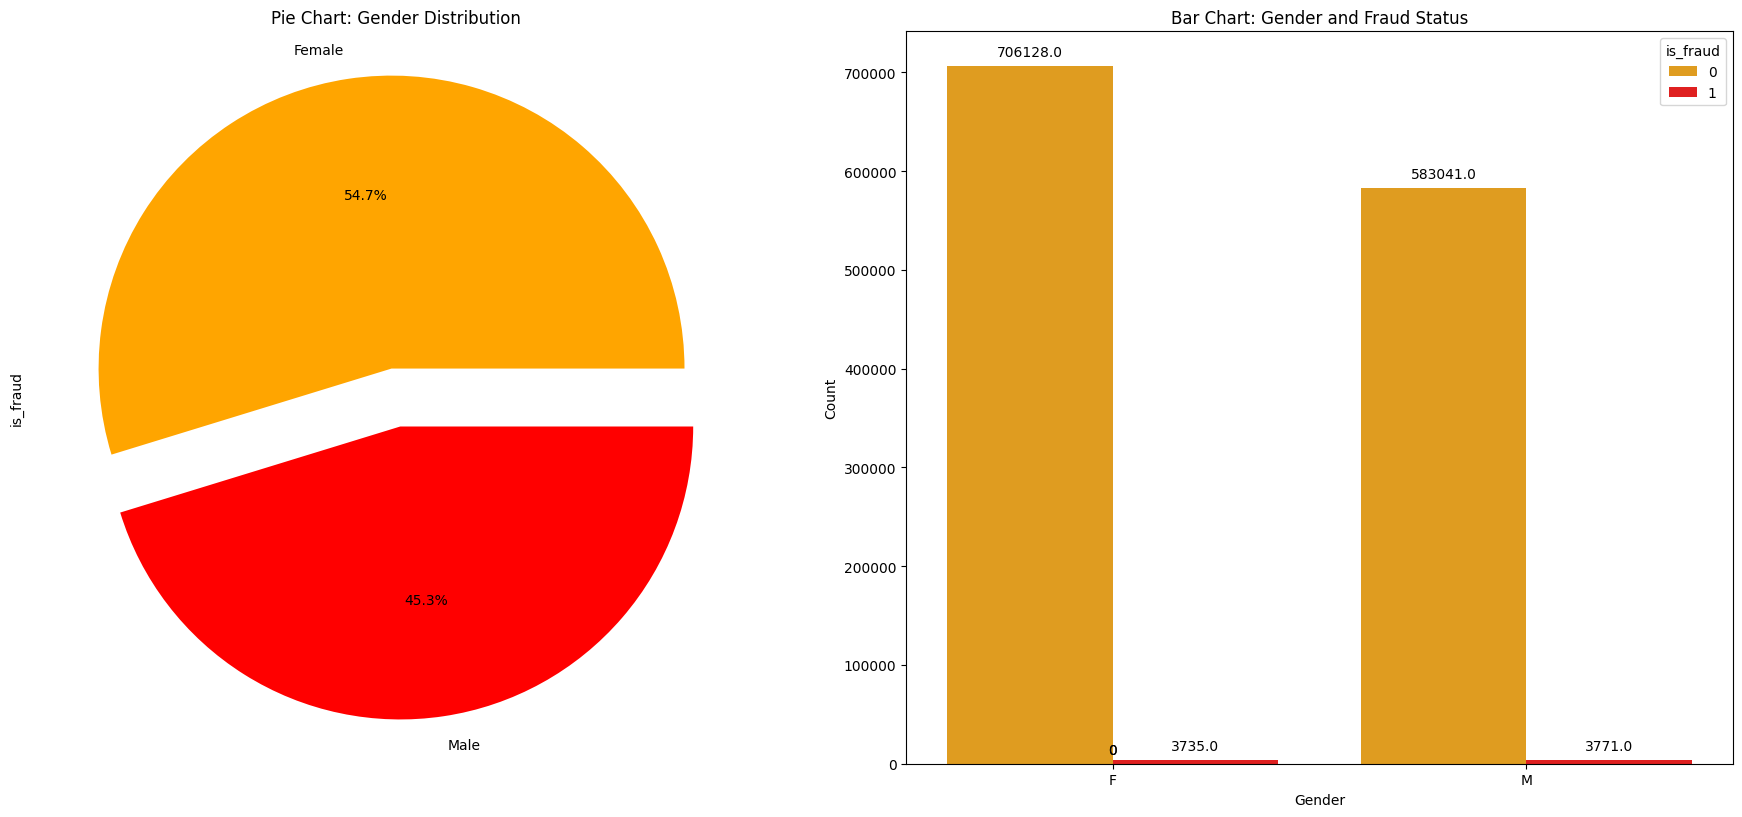

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 9))

gender_distribution_explode = [0.1, 0.1]
gender_distribution_colors = ['orange', 'red']
gender_fraud_pie_labels = ['Female', 'Male']

gender_fraud_count = train_data.groupby('gender')['is_fraud'].count()
gender_fraud_count.plot.pie(
    explode=gender_distribution_explode, autopct="%1.1f%%",
    colors=gender_distribution_colors, ax=axes[0], labels=gender_fraud_pie_labels
)


gender_fraud_bar_chart = sns.countplot(
    x="gender", hue="is_fraud", data=train_data, palette=gender_distribution_colors, ax=axes[1]
)

for patch in gender_fraud_bar_chart.patches:
    gender_fraud_bar_chart.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


axes[0].set_title('Pie Chart: Gender Distribution')
axes[1].set_title('Bar Chart: Gender and Fraud Status')


axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


<Axes: >

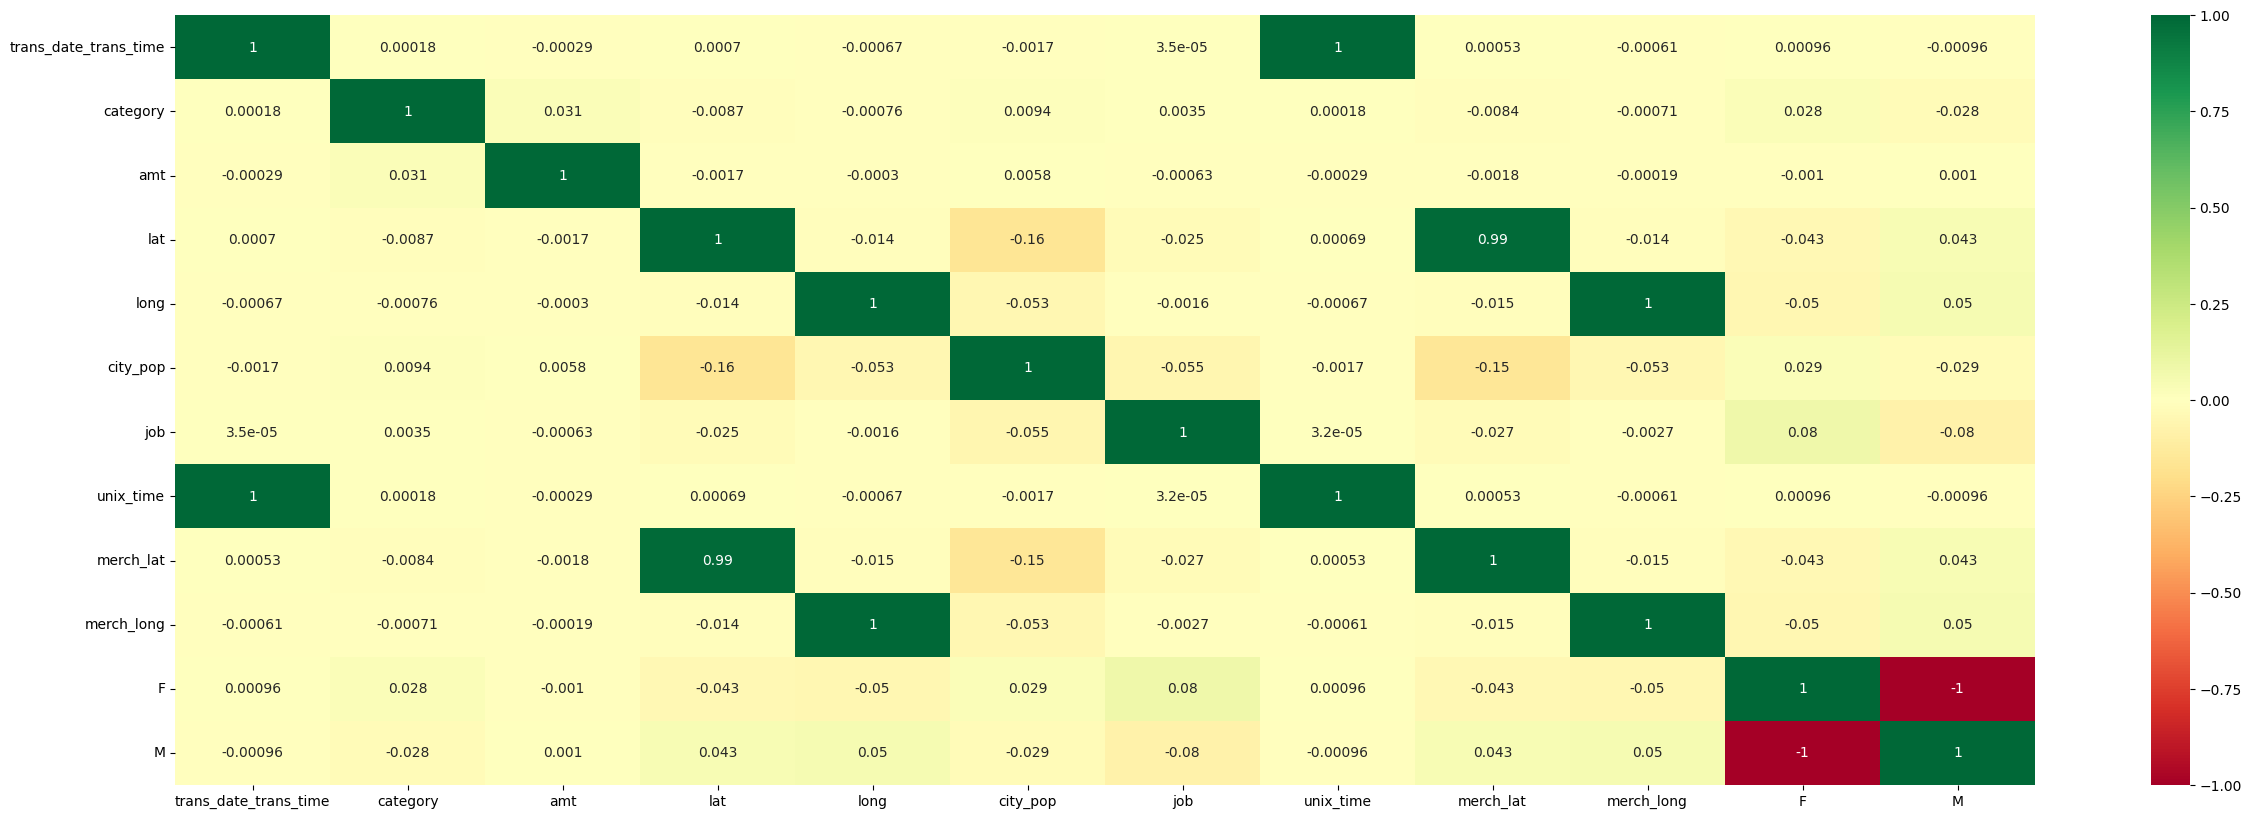

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 10))
sns.heatmap(x_data.corr(), annot = True, cmap = 'RdYlGn')

As we can see here there are certain highly corelated data. We can remove these values. We will use lat and long values instead of merch_lat and merch_long

In [ ]:
x_data = x_data.drop(['merch_lat', 'merch_long'], axis = 1)

array([[<Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'category'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'M'}>, <Axes: >, <Axes: >]], dtype=object)

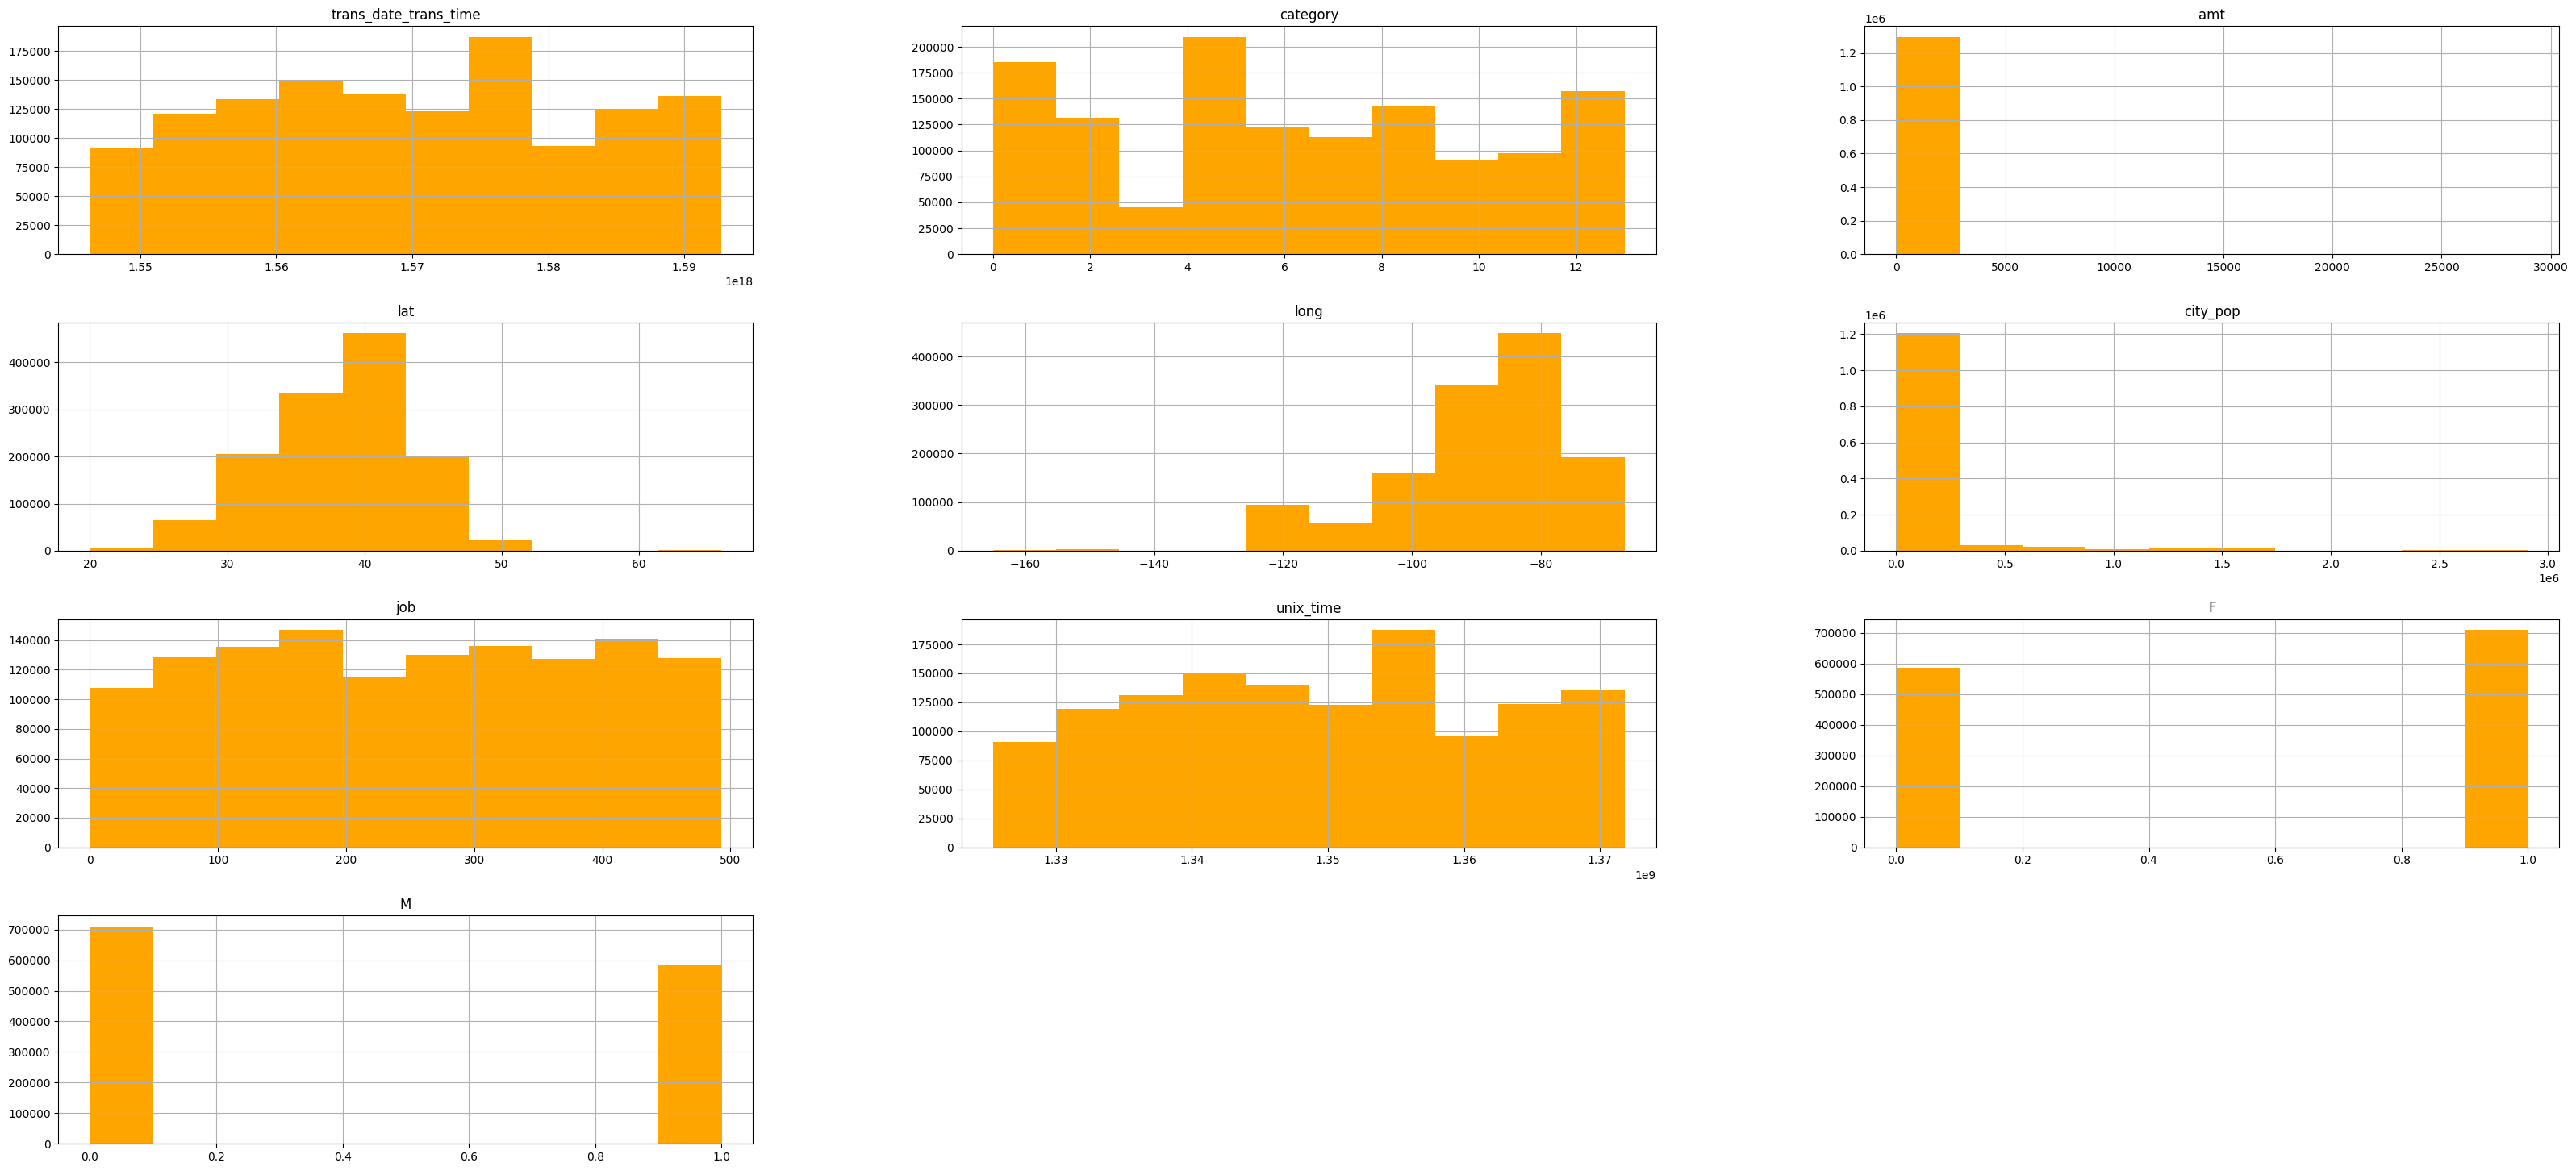

In [ ]:
x_data.hist(color='orange', figsize = (40, 18))

In [ ]:
print(x_data.category.value_counts)

<bound method IndexOpsMixin.value_counts of 0          8
1          4
2          0
3          2
4          9
          ..
1296670    0
1296671    1
1296672    1
1296673    1
1296674    1
Name: category, Length: 1296675, dtype: int64>


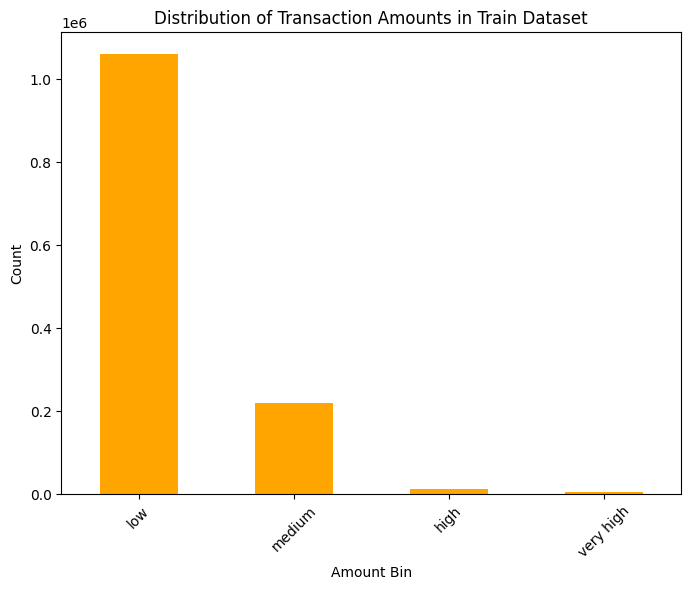

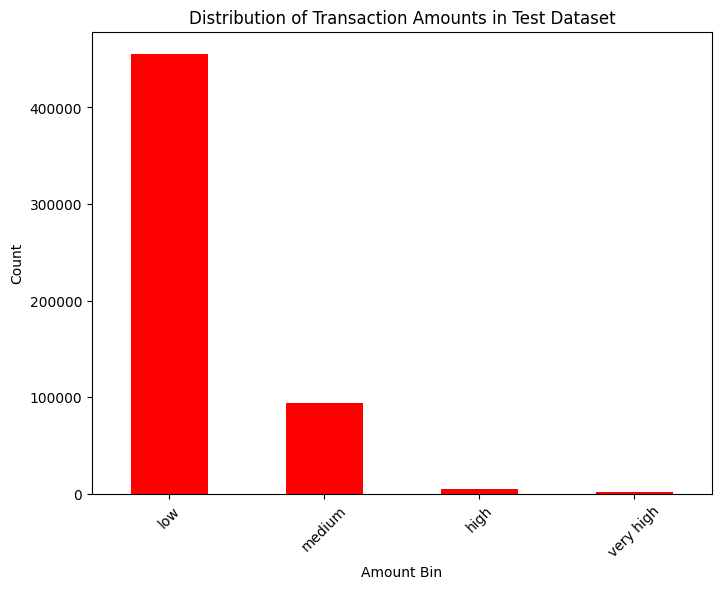

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


train_data_path = train_data_path
test_data_path = test_data_path
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

combined_data = pd.concat([train_data, test_data], ignore_index=True)

combined_data['trans_datetime'] = pd.to_datetime(combined_data['trans_date_trans_time'])
combined_data['hour'] = combined_data['trans_datetime'].dt.hour
combined_data['day_of_week'] = combined_data['trans_datetime'].dt.dayofweek

bins = [0, 100, 500, 1000, float('inf')]
labels = ['low', 'medium', 'high', 'very high']
combined_data['amount_bin'] = pd.cut(combined_data['amt'], bins=bins, labels=labels)

train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

plt.figure(figsize=(8, 6))
train_data['amount_bin'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Transaction Amounts in Train Dataset')
plt.xlabel('Amount Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
test_data['amount_bin'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Transaction Amounts in Test Dataset')
plt.xlabel('Amount Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

class_wei = {0: 0.35, 1: 1.0}

import numpy as np

def calculate_class_weights(y):
    class_counts = np.bincount(y)
    N = np.sum(class_counts)
    K = len(class_counts)
    class_weights = {}
    for c, n_c in enumerate(class_counts):
        class_weights[c] = N / (K * n_c)
    return class_weights

# Assuming y contains the class labels
class_weights = calculate_class_weights(y_data)
print(class_weights)


X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3,random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5, class_weight=class_weights)
clf_model.fit(X_train,y_train)

{0: 0.5029111776656126, 1: 86.37589928057554}


DecisionTreeClassifier(class_weight={0: 0.5029111776656126,
                                     1: 86.37589928057554},
                       max_depth=3, min_samples_leaf=5, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    386718
           1       0.03      0.95      0.05      2285

    accuracy                           0.80    389003
   macro avg       0.51      0.87      0.47    389003
weighted avg       0.99      0.80      0.88    389003



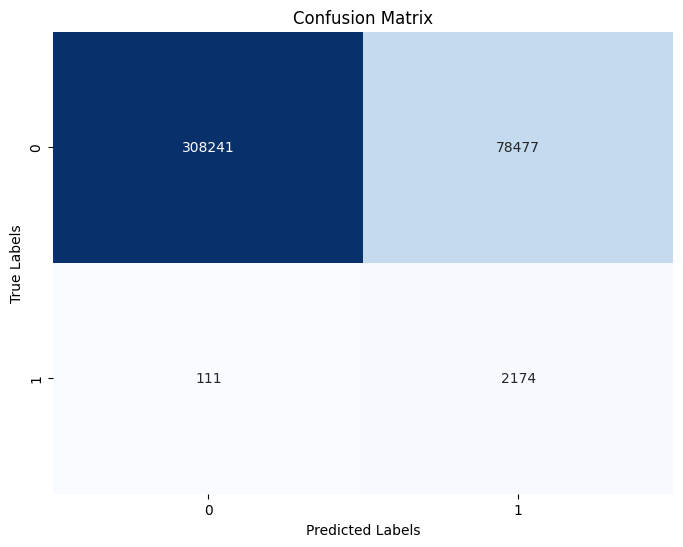

In [ ]:
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

print("Classification Report:")
print(classification_report(y_test, y_predict))

conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

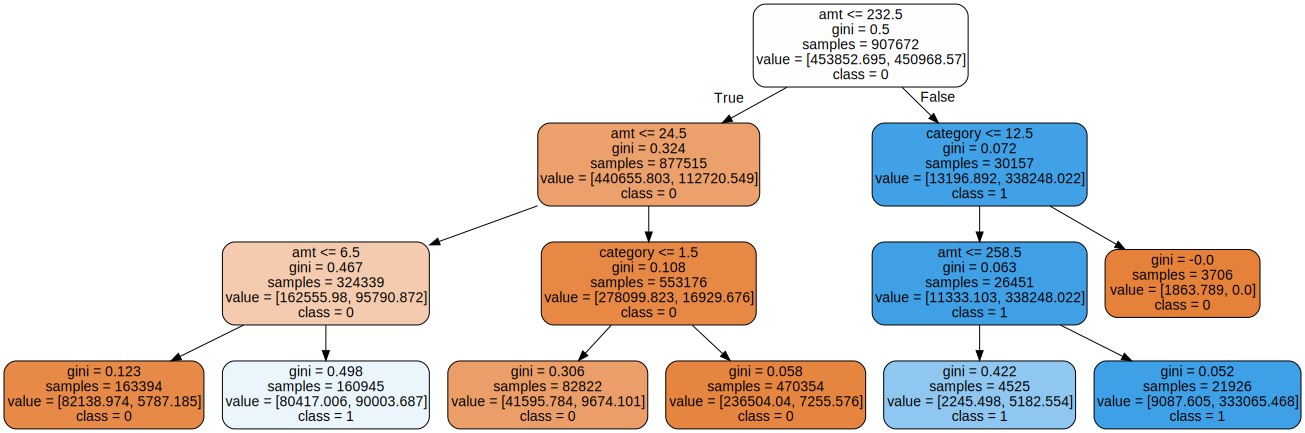

In [ ]:
from sklearn import tree
import graphviz
graphvis = tree.export_graphviz(clf_model, feature_names=X_train.columns, class_names = ['0', '1'], filled = True, rounded = True)
graphviz.Source(graphvis)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.005554781587724792


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9941388551487458


Mean Squared Error (Validation): 0.005826559141127702
R^2 Score (Validation): 3.993469576057951e-05


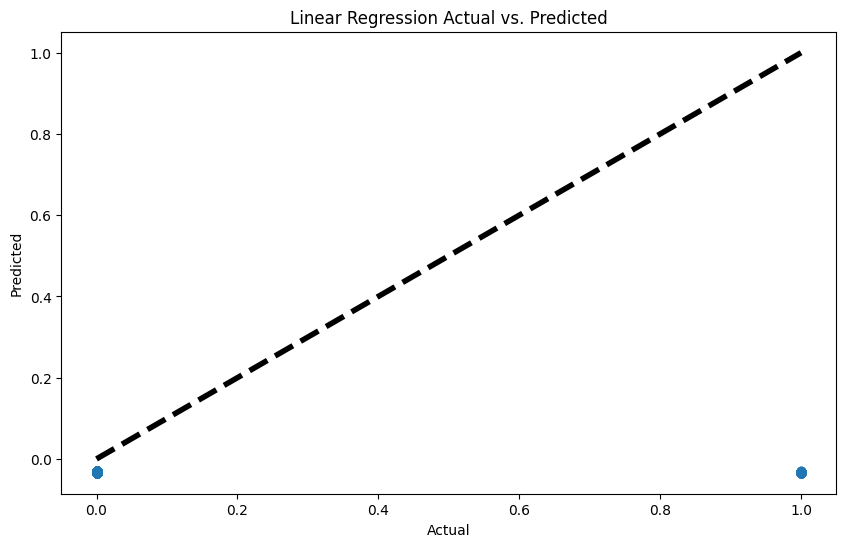

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_data_path = train_data_path
test_data_path = test_data_path
features = train_data.select_dtypes(include=['int64', 'float64']).drop(columns='is_fraud')

target = train_data['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_val_pred = linear_model.predict(X_val)

X_test = test_data.select_dtypes(include=['int64', 'float64']).drop(columns='is_fraud')
y_test = test_data['is_fraud']
y_test_pred = linear_model.predict(X_test)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error (Validation): {mse_val}')
print(f'R^2 Score (Validation): {r2_val}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Actual vs. Predicted')
plt.show()

Accuracy: 0.9961401355721147


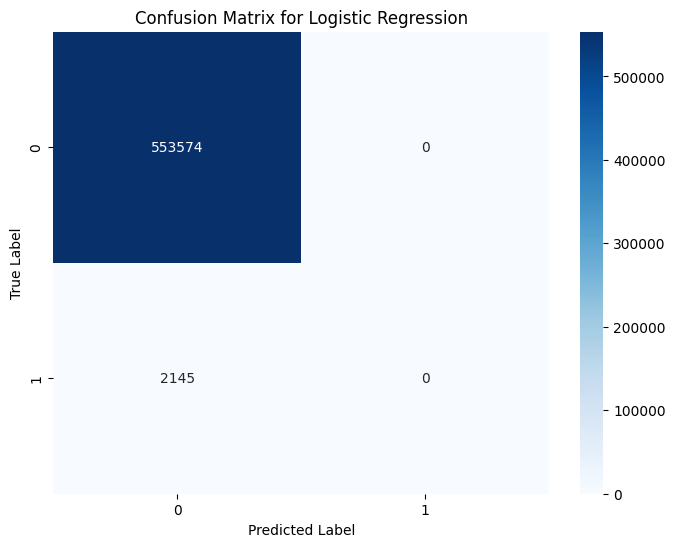

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
features = train_data.select_dtypes(include=['int64', 'float64']).drop(columns='is_fraud')
target = train_data['is_fraud']

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(features, target)

X_test = test_data.select_dtypes(include=['int64', 'float64']).drop(columns='is_fraud')
y_test = test_data['is_fraud']
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

<ipython-input-26-654fd6dfaa00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
<ipython-input-26-654fd6dfaa00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['trans_date_trans_time'] = train_data['trans_date_trans_time'].astype(np.int64) // 10**9


Mean Squared Error: 28244.80583818065


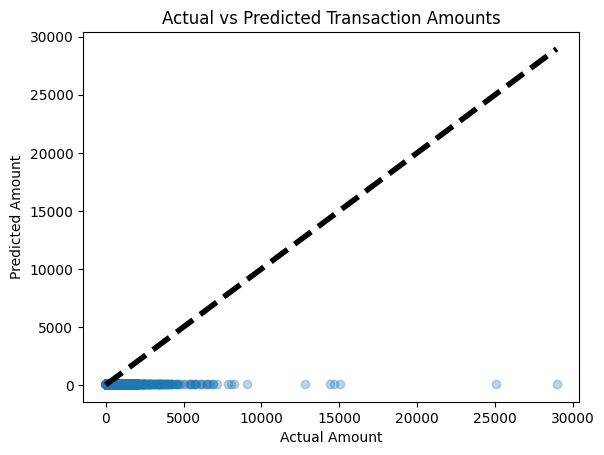

In [ ]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

train_data['trans_date_trans_time'] = train_data['trans_date_trans_time'].astype(np.int64) // 10**9

X = train_data.select_dtypes(include=['int64', 'float64'])

y = train_data['amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Transaction Amounts')
plt.show()

Accuracy: 0.9910854226686509


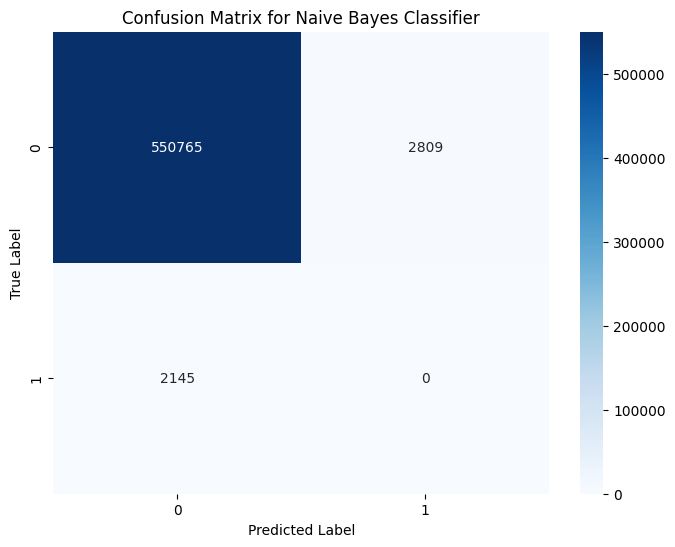

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTrain/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTest/fraudTest.csv')

X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']

X_train = X_train.drop(columns=['amt'], errors='ignore')
X_test = test_data.drop(columns=['is_fraud', 'amt'], errors='ignore')

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


model.fit(X_train_split, y_train_split)
X_test = test_data[X_train.columns]

y_pred = model.predict(X_test)


accuracy = accuracy_score(test_data['is_fraud'], y_pred)
print(f'Accuracy: {accuracy}')


cm = confusion_matrix(test_data['is_fraud'], y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.991265369728226
Confusion Matrix:
[[549858   3716]
 [  1138   1007]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.21      0.47      0.29      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.73      0.64    555719
weighted avg       0.99      0.99      0.99    555719

ROC AUC Score: 0.7313755632260476


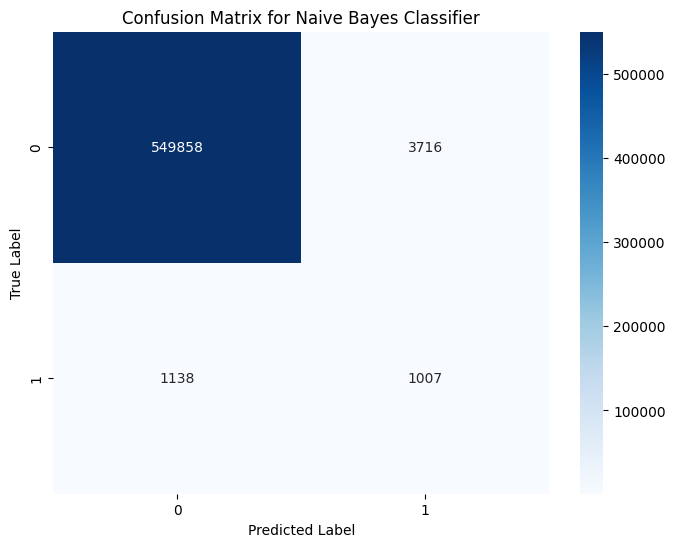

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)


X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']

X_test = test_data[X_train.columns]
y_test = test_data['is_fraud']

numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'ROC AUC Score: {roc_auc}')


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


train_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTrain/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTest/fraudTest.csv')

X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']


X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X_train.select_dtypes(include=['object']).columns)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])


pipeline.fit(X_train, y_train)


y_pred_test = pipeline.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
print('\nTest Classification Report:\n', classification_report(y_test, y_pred_test))
print('\nTest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))


Test Accuracy: 0.9950010706850044

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.02      0.01      0.01      2145

    accuracy                           1.00    555719
   macro avg       0.51      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


Test Confusion Matrix:
 [[552929    645]
 [  2133     12]]


# SVC

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  int64         
 3   amt                    1296675 non-null  float64       
 4   lat                    1296675 non-null  float64       
 5   long                   1296675 non-null  float64       
 6   city_pop               1296675 non-null  int64         
 7   job                    1296675 non-null  int64         
 8   unix_time              1296675 non-null  int64         
 9   merch_lat              1296675 non-null  float64       
 10  merch_long             1296675 non-null  float64       
 11  F                      12966

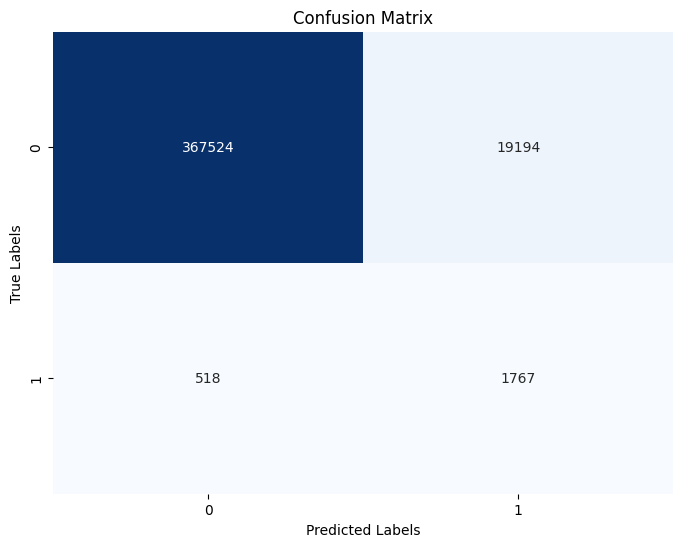

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    386718
           1       0.08      0.77      0.15      2285

    accuracy                           0.95    389003
   macro avg       0.54      0.86      0.56    389003
weighted avg       0.99      0.95      0.97    389003



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

train_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTrain/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data/fraudTest/fraudTest.csv')

filtered_data = train_data.drop(['Unnamed: 0', 'cc_num','dob', 'street', 'city', 'state', 'zip', 'first', 'last', 'trans_num'], axis = 1)
x_data = filtered_data.drop(['is_fraud'], axis = 1)
y_data = filtered_data.is_fraud
print(y_data.value_counts())

#print(x_data.info())
#print(x_data['trans_date_trans_time'].head(1))
x_data['trans_date_trans_time'] = pd.to_datetime(x_data['trans_date_trans_time'])
#print(x_data.info())
x_data['gender'] = x_data['gender'].astype(str)
one_hot_encoded = pd.get_dummies(x_data['gender']).astype('int64')
x_data = pd.concat([x_data, one_hot_encoded], axis = 1)
x_data.drop(['gender'], axis = 1, inplace = True)
#print(x_data.info())
#print(x_data.head(5))

from sklearn.preprocessing import LabelEncoder

data_to_encode = x_data['category']
encoded = LabelEncoder().fit_transform(data_to_encode)
encoded_data = pd.DataFrame(encoded)
#print(encoded_data.head(5))


### encoding the job
encode_job = x_data['job']
encoded_job = pd.DataFrame(LabelEncoder().fit_transform(encode_job))

x_data['category'] = encoded_data
x_data['job'] = encoded_job
x_data.info()
x_data = x_data.drop(['merchant'], axis = 1)

x_data = x_data.astype('int64')
print(x_data.info())

x_data = x_data.drop(['merch_lat', 'merch_long'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3,random_state=42)



sample_indices = np.random.choice(X_train.shape[0], 10000, replace=False)

X_train_sampled = X_train.iloc[sample_indices]
y_train_sampled = y_train.iloc[sample_indices]



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svc', SVC(kernel='linear', C=1.0, class_weight=class_weights))
])


pipeline.fit(X_train_sampled, y_train_sampled)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

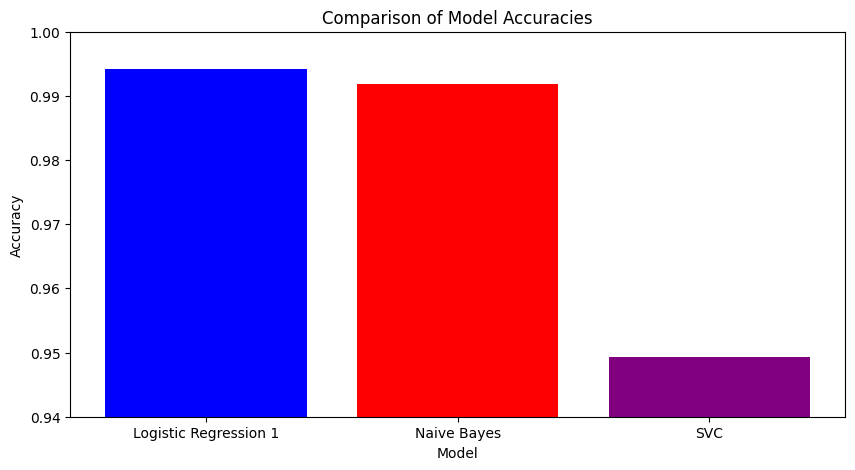

In [2]:
import matplotlib.pyplot as plt

accuracies = [0.994138554187458, 0.9918542266866959, 0.9493286868944554]
model_names = ['Logistic Regression 1', 'Naive Bayes', 'SVC']

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.94, 1])
plt.show()
